In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Exploratory Data Analysis

In [3]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.tail(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [7]:
data['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [8]:
data['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
data.shape

(545, 13)

In [11]:
data.size

7085

In [12]:
data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [13]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [14]:
# To check null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
# label encoding
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

# one hot encoding
data = pd.get_dummies(data, columns=['furnishingstatus'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


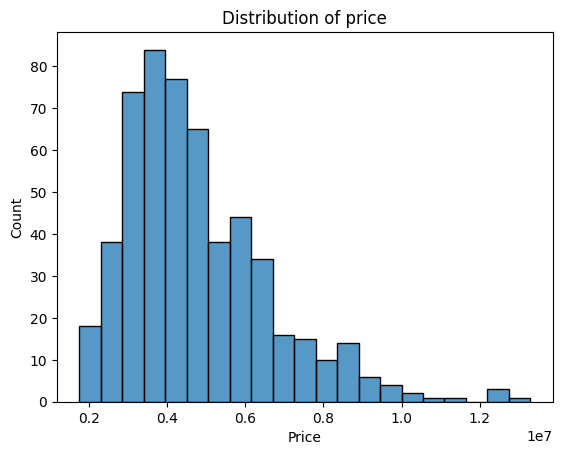

In [16]:
# plt.hist(data["price"])
sns.histplot(data['price'])
plt.title("Distribution of price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

insights:- price is more inclined towards 0.4

In [17]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


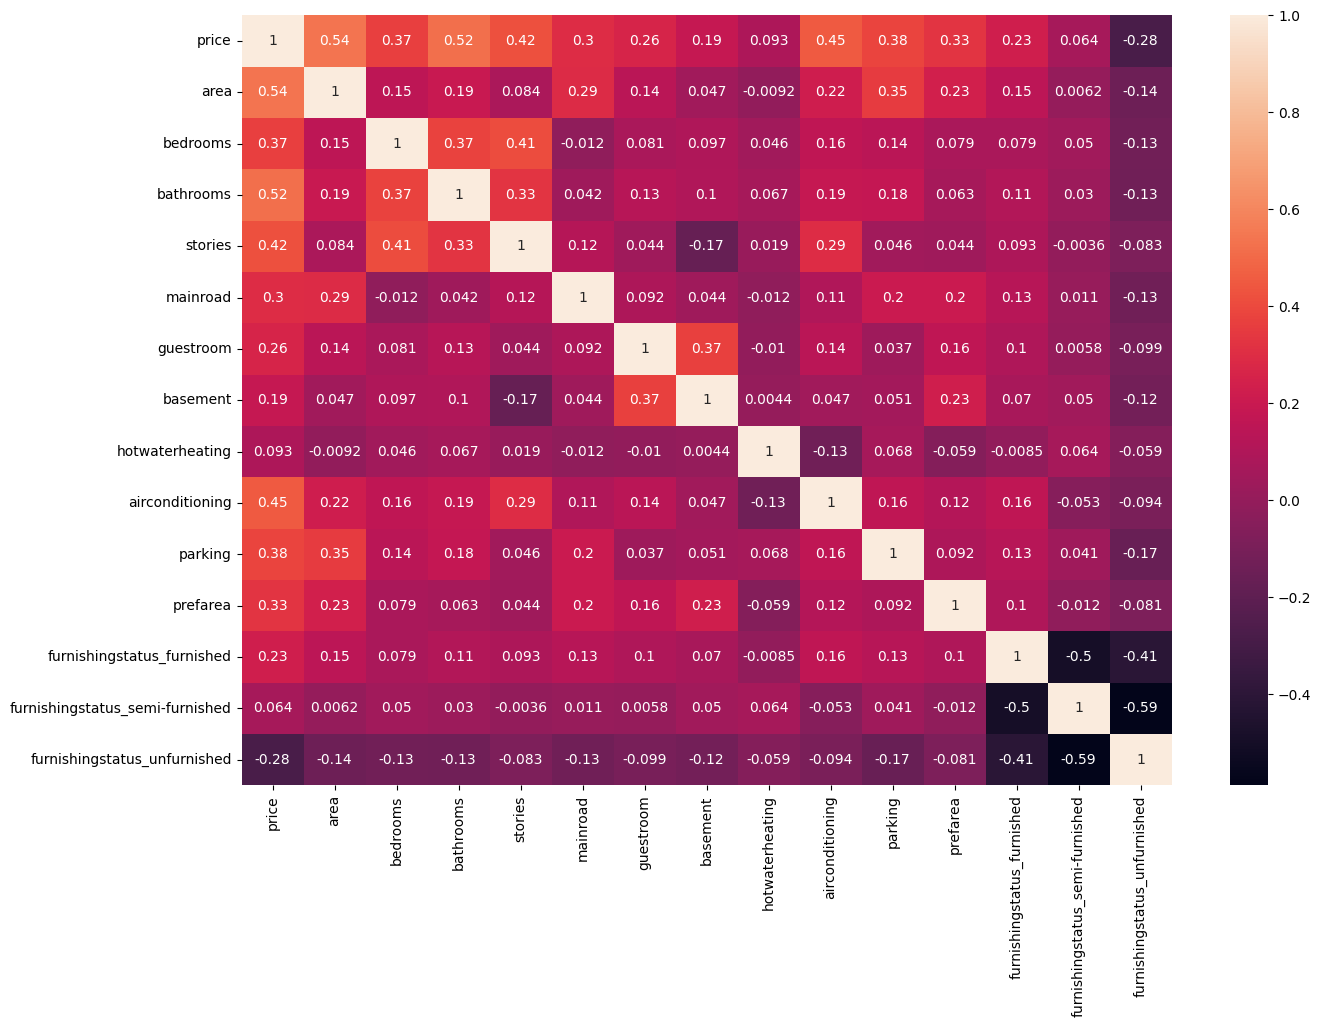

In [18]:
corr_mat = data.corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr_mat,annot= True)
plt.title = ("Correlation Matrix")
plt.show()

In [19]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

[Text(0.5, 1.0, 'bar graph')]

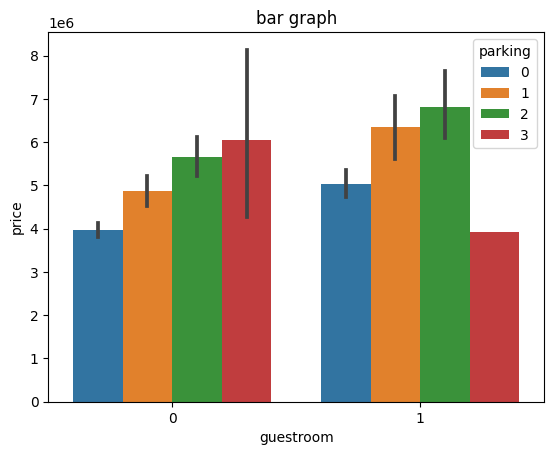

In [20]:
# akshat
sns.barplot(data=data,x='guestroom',y='price',hue='parking').set(title = "bar graph")

<Axes: xlabel='guestroom', ylabel='price'>

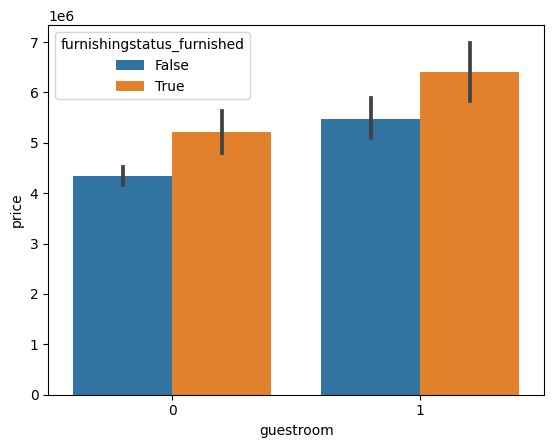

In [21]:
# Aman
sns.barplot(data=data,x="guestroom",hue="furnishingstatus_furnished",y="price")

<Axes: xlabel='basement', ylabel='area'>

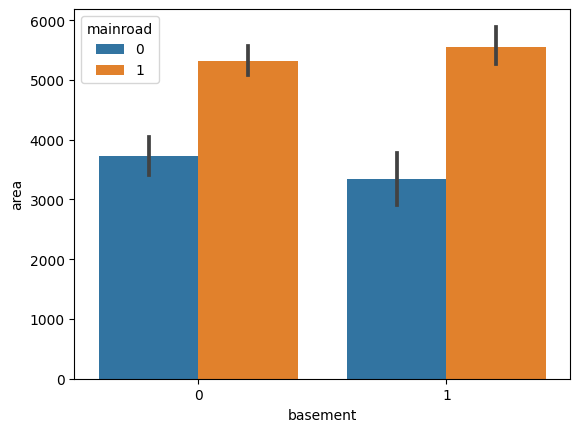

In [22]:
# Aman
sns.barplot(data=data,x="basement",y="area",hue="mainroad")

<Axes: xlabel='stories', ylabel='price'>

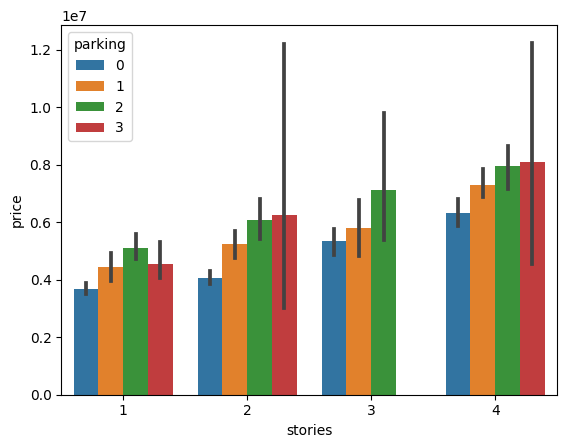

In [23]:
# Abhishek
sns.barplot(data=data,x="stories",y="price",hue='parking')

<Axes: xlabel='bedrooms', ylabel='price'>

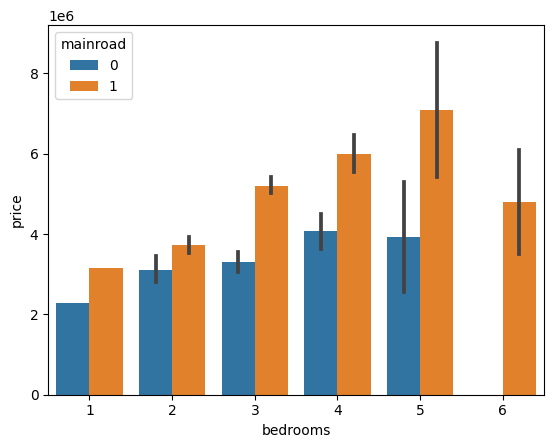

In [24]:
# sns.barplot(data["bedrooms"],data["price"])
sns.barplot(data = data , x= "bedrooms", y= "price", hue = "mainroad" )

In [25]:
sns.scatterplot(data['price'], data['area'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
# Aaditya
plt.figure(figsize=(7,5))
sns.stripplot(data['airconditioning'],data['price'],hue=data['furnishingstatus_furnished'])
plt.show()

TypeError: stripplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 700x500 with 0 Axes>

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


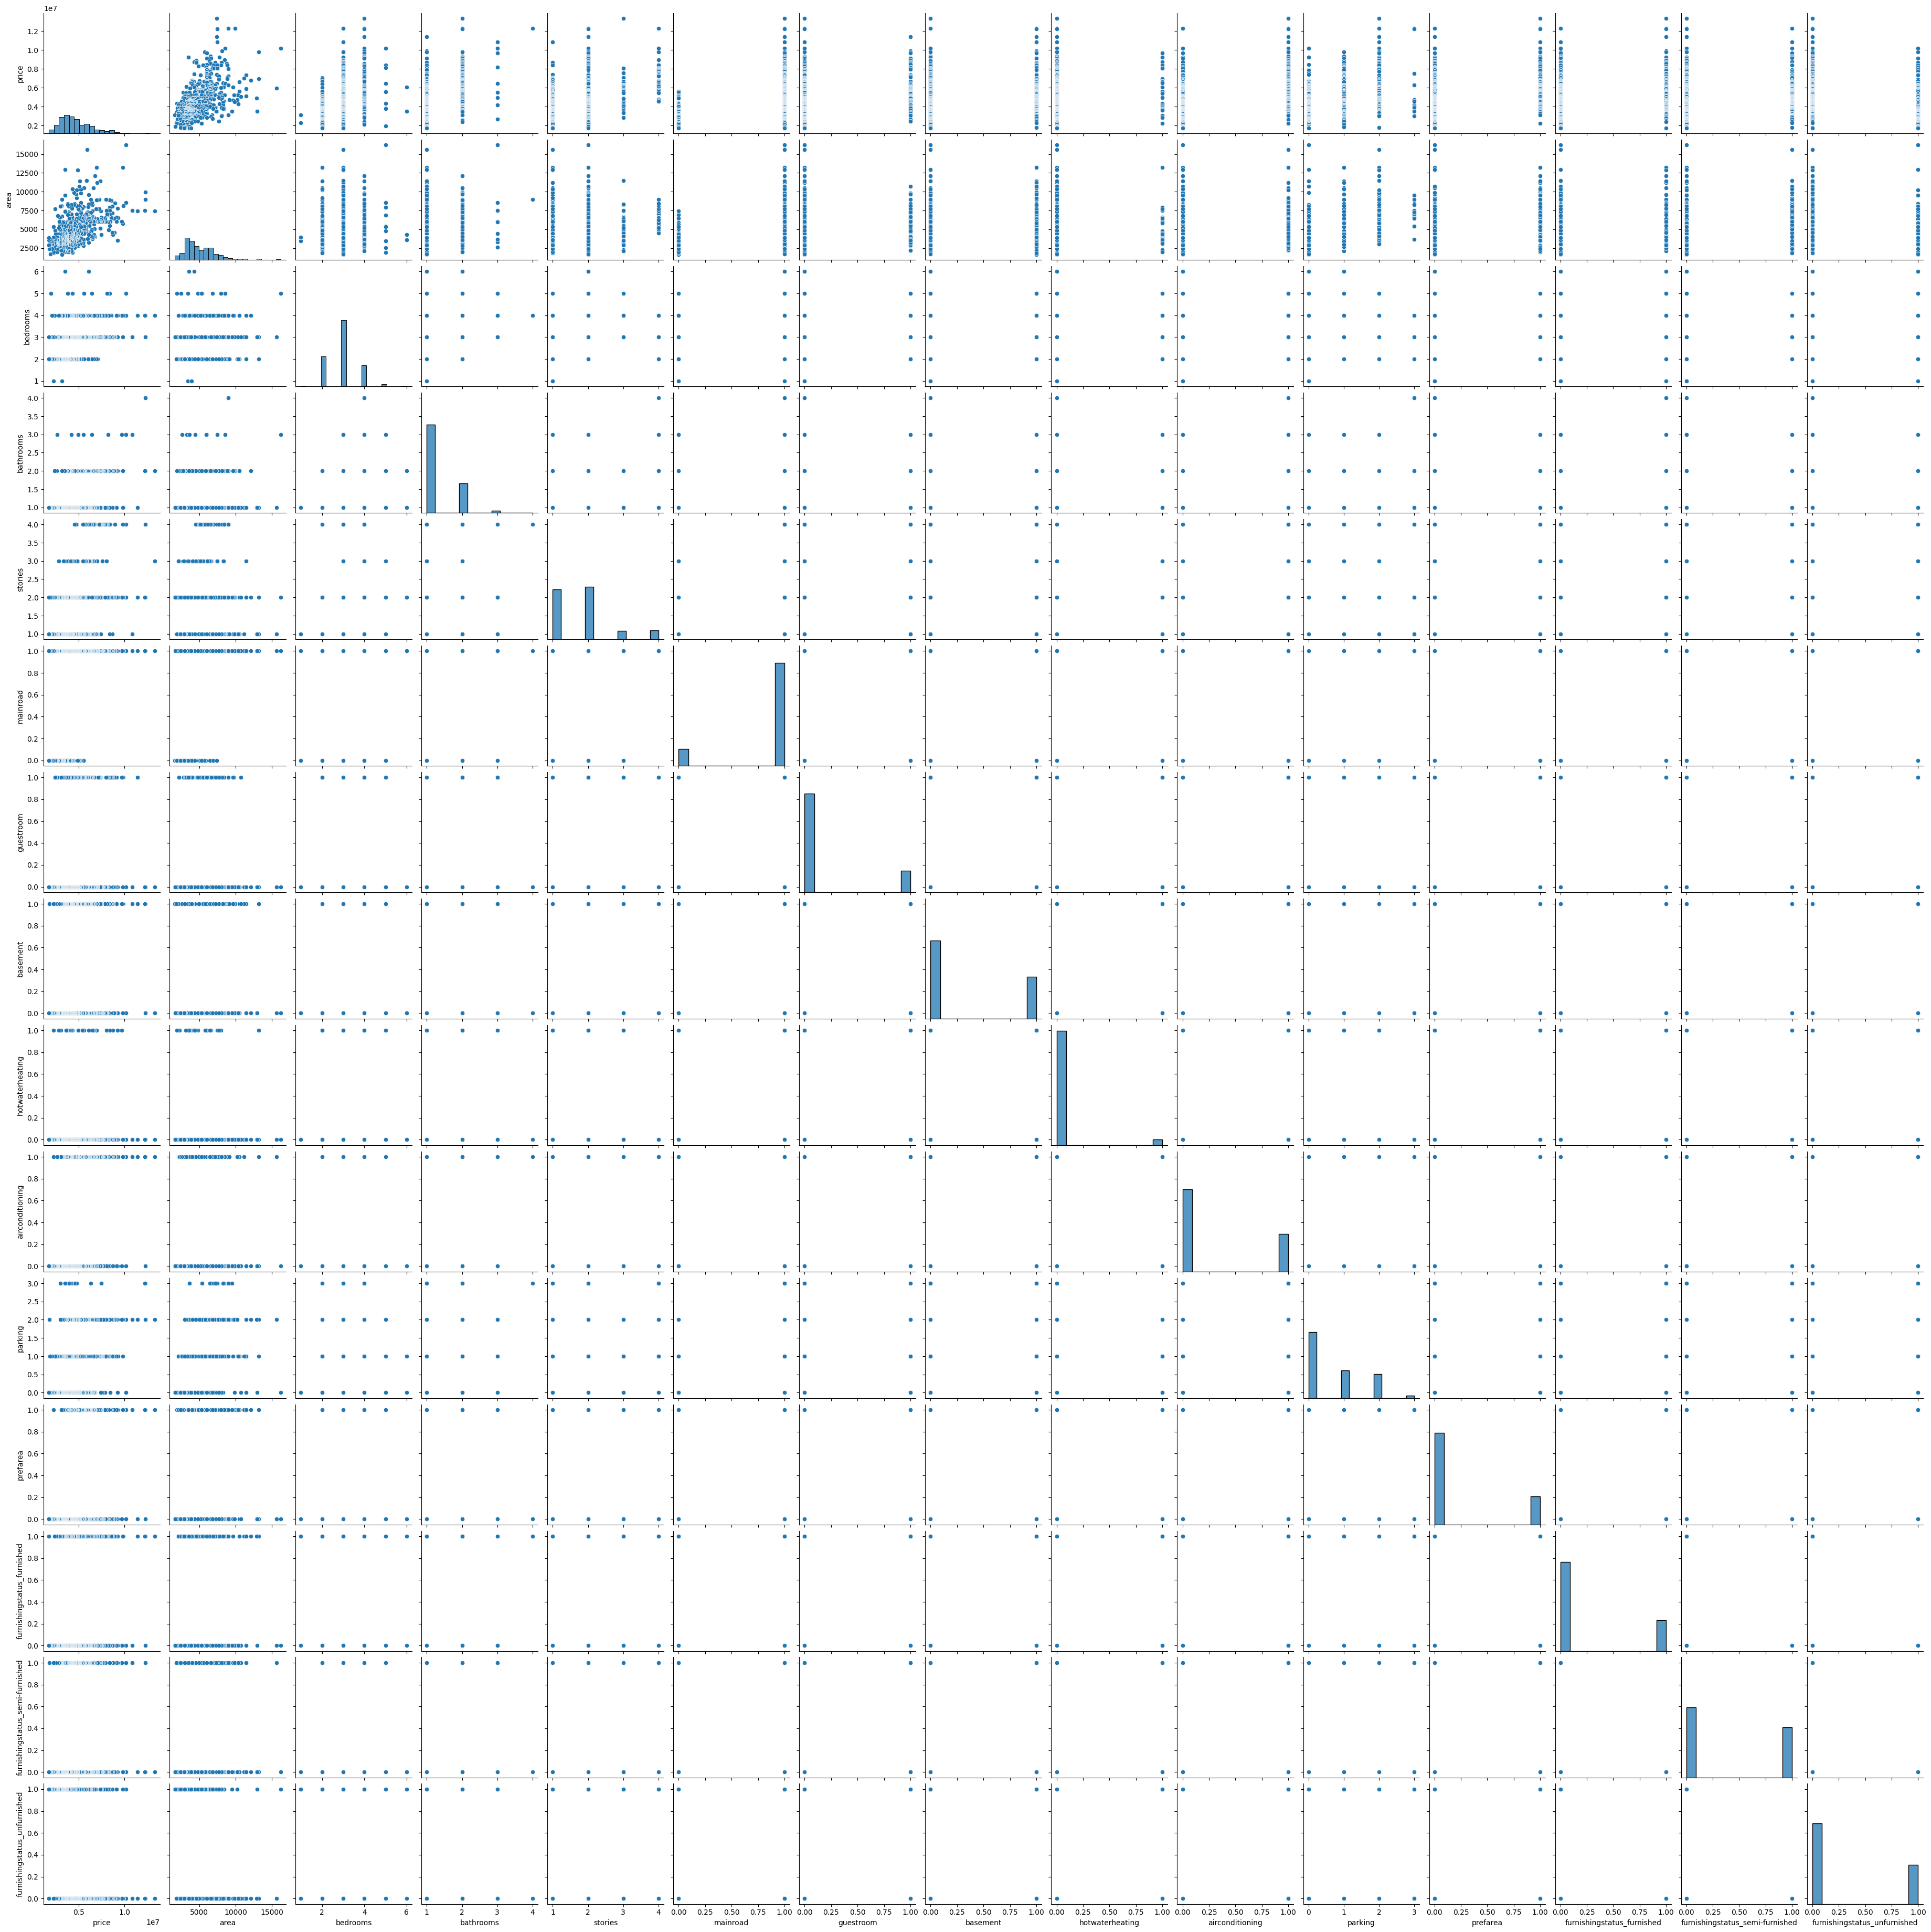

In [26]:
sns.pairplot(data)

In [27]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

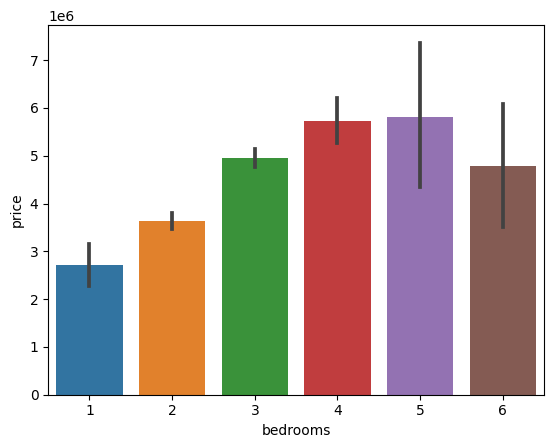

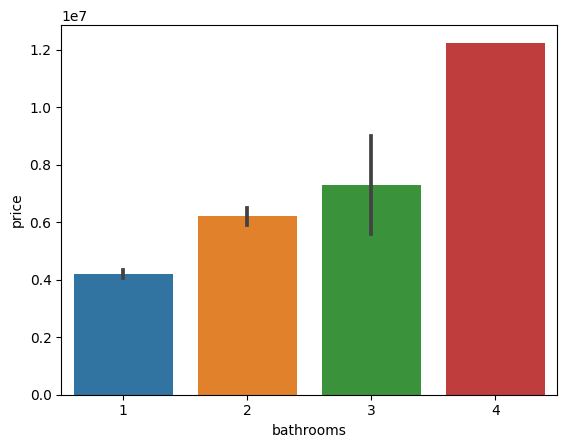

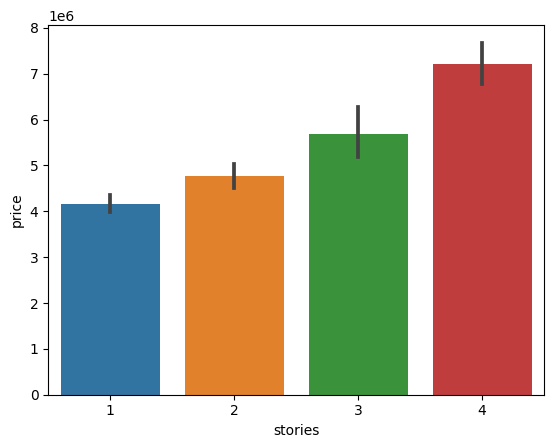

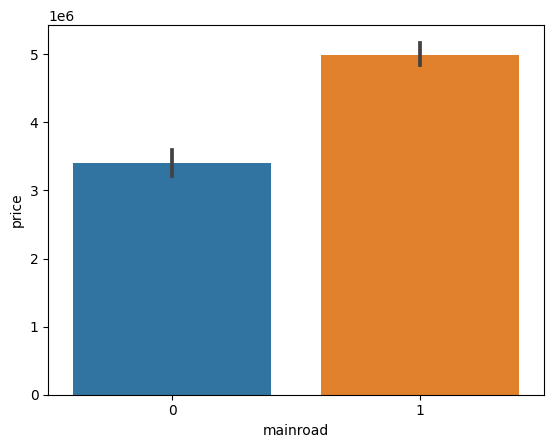

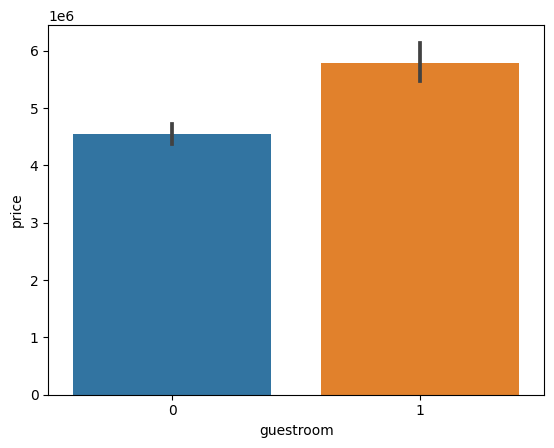

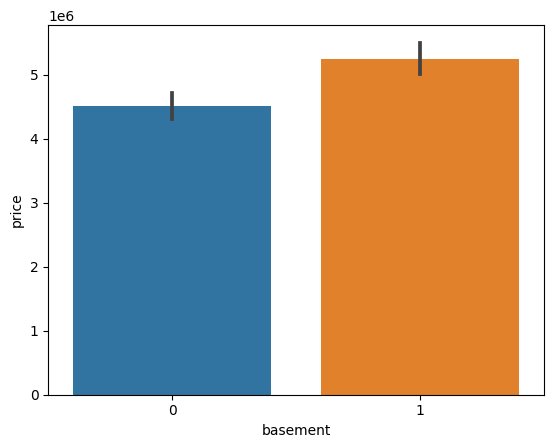

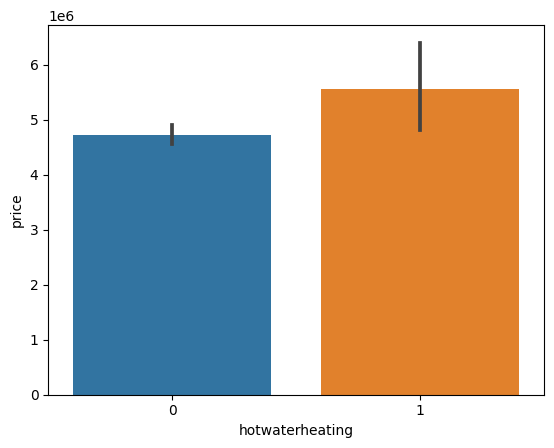

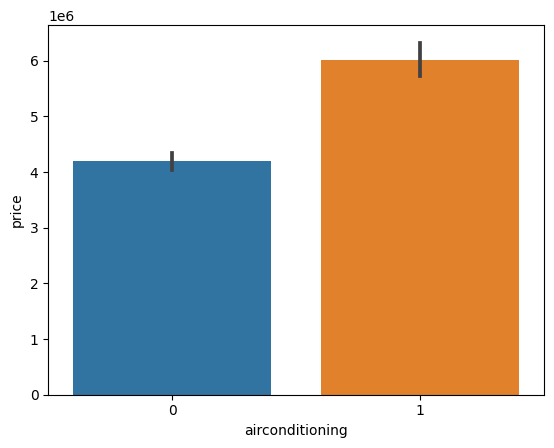

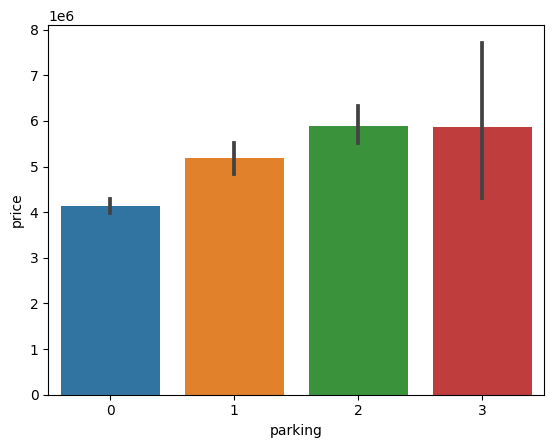

In [28]:
selected_col = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking']
for col in selected_col:
    sns.barplot(data = data , x=col, y= "price",)
    plt.show()

In [29]:
data.shape

(545, 15)

# Train test split

In [30]:
X = data.drop("price",axis= 1)
y = data["price"]

In [31]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=50)

In [32]:
len(y_train)

408

# Model Training

In [33]:
LR_model = LinearRegression()

In [34]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [35]:
# y_pred is the model pred from X_test data
y_pred = LR_model.predict(X_test)

In [36]:
y_test[333] - y_pred[0]

432623.58811646374

In [37]:
y_pred[0]

3487376.4118835363

(array([19., 28., 22., 27., 17., 10., 11.,  2.,  0.,  1.]),
 array([ 2100690.10265655,  2940717.17750609,  3780744.25235563,
         4620771.32720517,  5460798.40205471,  6300825.47690425,
         7140852.55175378,  7980879.62660332,  8820906.70145286,
         9660933.7763024 , 10500960.85115194]),
 <BarContainer object of 10 artists>)

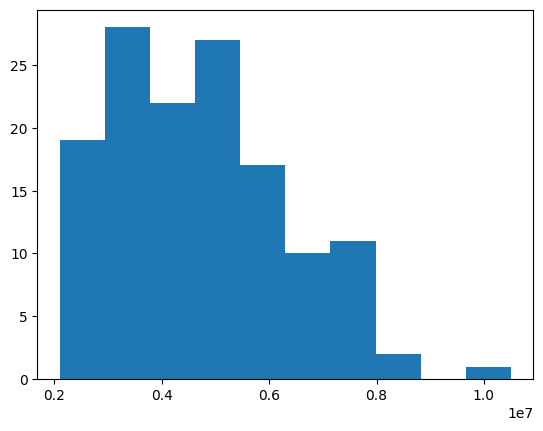

In [38]:
plt.hist(y_pred)

(array([15., 40., 24., 26., 19.,  4.,  5.,  3.,  0.,  1.]),
 array([ 1750000.,  2800000.,  3850000.,  4900000.,  5950000.,  7000000.,
         8050000.,  9100000., 10150000., 11200000., 12250000.]),
 <BarContainer object of 10 artists>)

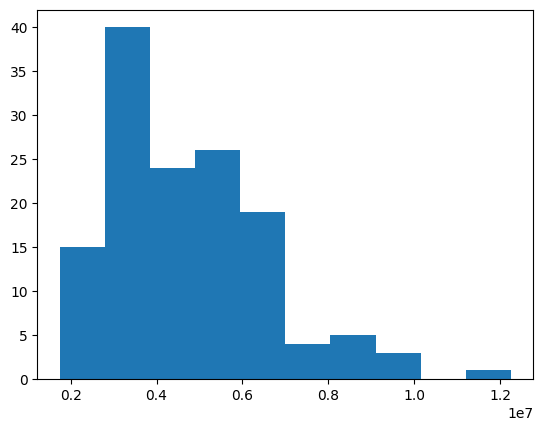

In [39]:
plt.hist(y_test)

### Comparing predicted and test(Original) values

<Axes: xlabel='price'>

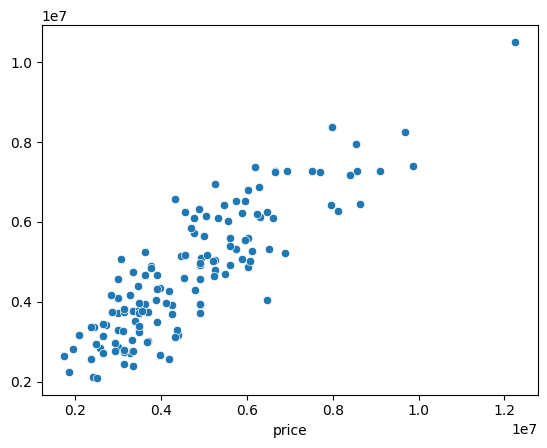

In [40]:
sns.scatterplot(x = y_test, y = y_pred)


Text(0, 0.5, 'predicted value')

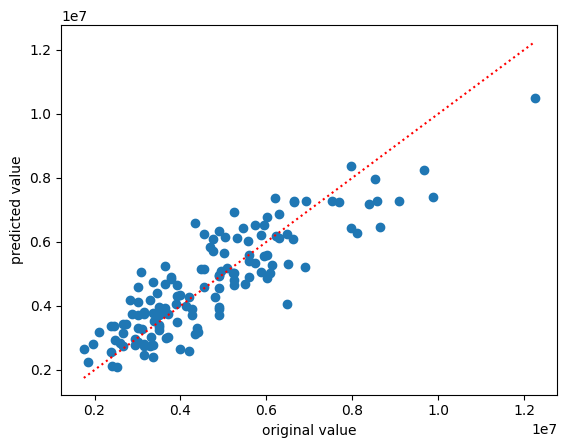

In [41]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r:')
plt.xlabel('original value')
plt.ylabel('predicted value')

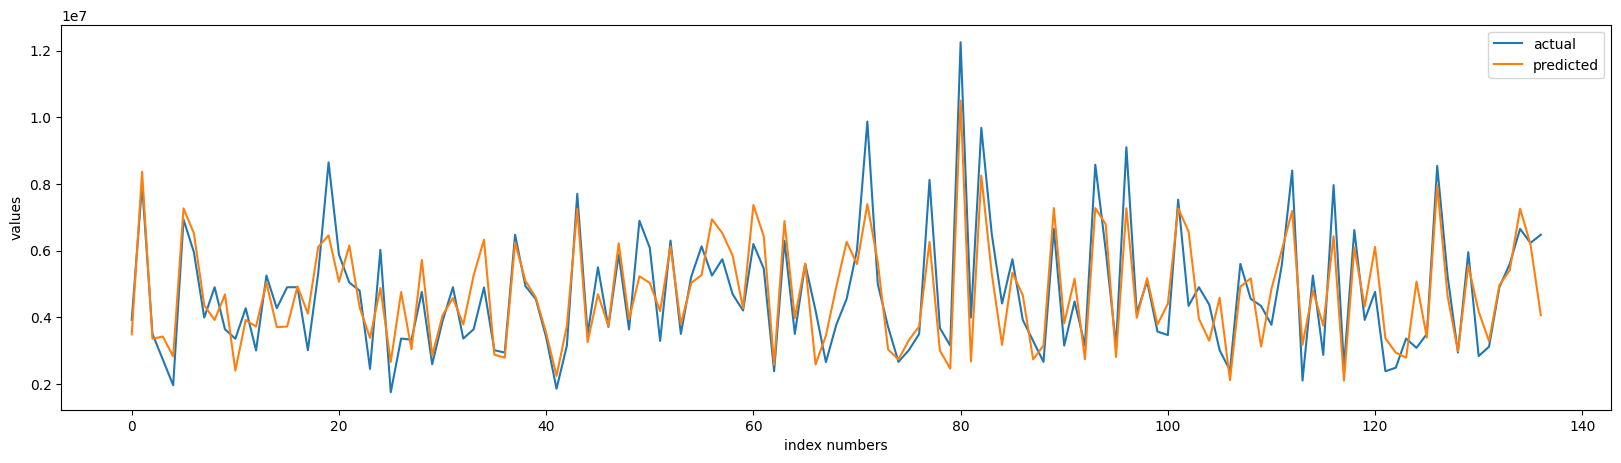

In [42]:
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y_test)),y_test, label = "actual") 
plt.plot(np.arange(len(y_pred)),y_pred, label ="predicted")
plt.xlabel("index numbers")
plt.ylabel("values")
plt.legend() 

plt.show()

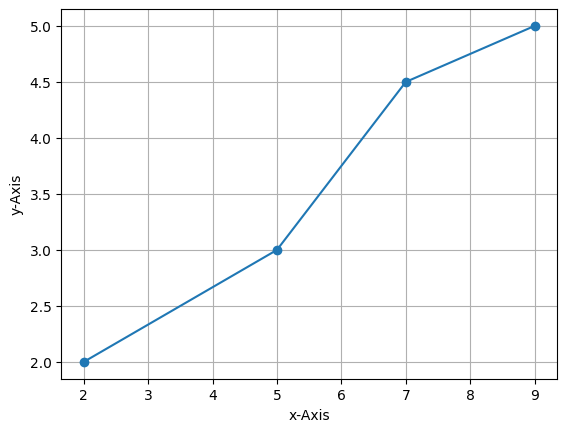

In [43]:
#line plot

import matplotlib.pyplot as plt 
x=  np.array([2,5,7,9])
y = np.array([2,3,4.5,5,])
plt.plot(x,y,"-",marker = "o", )
plt.xlabel("x-Axis")
plt.ylabel("y-Axis")
plt.grid() 
plt.show()